In [1]:
#Importing necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
#Importing dataset by defining the paths
dataset_path = "D:/GUVI-Data Science/Mainboot_Camp/Projects/Proj4_Multiclass_fish_image_classification/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data"
train_dir = os.path.join(dataset_path,'train')
test_dir = os.path.join(dataset_path,'test')
val_dir = os.path.join(dataset_path,'val')

In [3]:
#Approach-1
#Data Preprocessing and Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255, #Scales pixel values from the range [0, 255] to [0, 1].
    rotation_range = 20, #Rotates the image 20(+or-) degrees
    width_shift_range = 0.2, #Shifts image horizontally upto 20%
    height_shift_range = 0.2, #Shifts image vertically upto 20%
    shear_range = 0.2, #Distorts the image
    zoom_range = 0.2, #Zooms in or out by 20% 
    horizontal_flip = True, #Flips image horizontally
    fill_mode = 'nearest', #When rotating,zooming or shifting, empty areas created, it fills those gaps using nearest pixel values 
    validation_split = 0.2, #20% for validation 
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
#Loading the data
train_data = train_datagen.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32,class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir,target_size=(224, 224),batch_size=32,class_mode='categorical')
val_data = val_datagen.flow_from_directory(val_dir,target_size=(224, 224),batch_size=32,class_mode='categorical')

Found 6225 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.


In [ ]:
#target_size --> Resizes all the images into 224*224 pixels
#batch_size --> Loads 32 images per batch
#class_mode='categorical' --> Set the labels into One-Hot Encoding(categorical) format for multiclass

In [5]:
#Approach - 2
#Model Training - CNN(Convolutional Neural Network)
#Defining CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (224, 224, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3),activation = 'relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3),activation = 'relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(11,activation='softmax') # 11 classes are present
])

In [6]:
#Compiling the Model
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [7]:
#Displaying model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [8]:
#Fitting the model
history = model.fit(
    train_data,
    epochs = 20,
    validation_data = val_data,
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)],
    verbose = 2 #For cleaner output for larger model
)

Epoch 1/20
195/195 - 334s - loss: 1.8958 - accuracy: 0.3192 - val_loss: 1.3910 - val_accuracy: 0.5476 - 334s/epoch - 2s/step
Epoch 2/20
195/195 - 406s - loss: 1.4620 - accuracy: 0.4559 - val_loss: 1.1341 - val_accuracy: 0.5897 - 406s/epoch - 2s/step
Epoch 3/20
195/195 - 369s - loss: 1.2531 - accuracy: 0.5274 - val_loss: 0.8872 - val_accuracy: 0.6941 - 369s/epoch - 2s/step
Epoch 4/20
195/195 - 345s - loss: 1.1263 - accuracy: 0.5793 - val_loss: 0.8221 - val_accuracy: 0.7005 - 345s/epoch - 2s/step
Epoch 5/20
195/195 - 345s - loss: 1.0259 - accuracy: 0.6239 - val_loss: 0.7435 - val_accuracy: 0.7436 - 345s/epoch - 2s/step
Epoch 6/20
195/195 - 341s - loss: 0.9195 - accuracy: 0.6553 - val_loss: 0.5875 - val_accuracy: 0.8379 - 341s/epoch - 2s/step
Epoch 7/20
195/195 - 358s - loss: 0.8642 - accuracy: 0.6920 - val_loss: 0.5539 - val_accuracy: 0.8233 - 358s/epoch - 2s/step
Epoch 8/20
195/195 - 349s - loss: 0.7807 - accuracy: 0.7202 - val_loss: 0.4441 - val_accuracy: 0.8755 - 349s/epoch - 2s/step


In [13]:
#Evaluating the Model 
test_loss,test_acc = model.evaluate(test_data)
print(f"Test Accuracy : {test_acc * 100:.2f}%")

100/100 [==============================] - 66s 658ms/step - loss: 0.3174 - accuracy: 0.9034
Test Accuracy : 90.34%


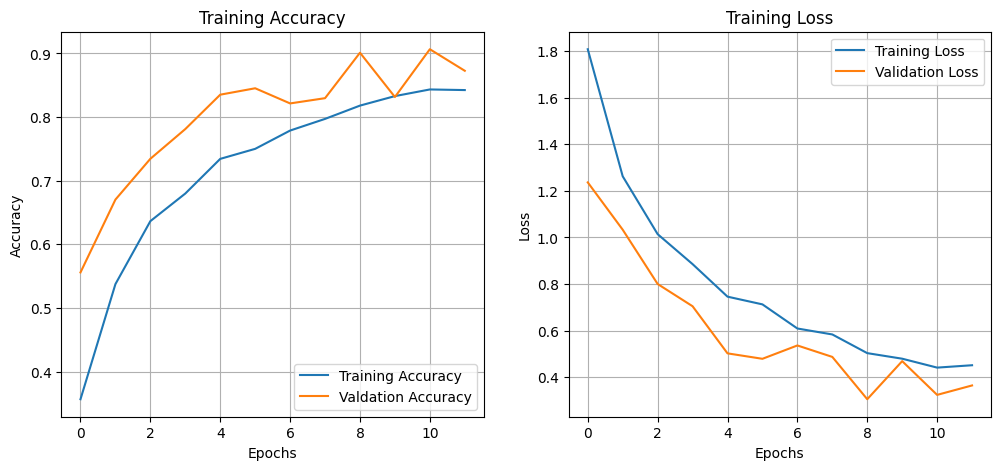

In [16]:
#Plotting the training and validation accuracy
plt.figure(figsize=(12,5))
#Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'],label = 'Valdation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')
plt.grid(True)
#Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.title('Training Loss')
plt.grid(True)
plt.show()

In [19]:
#To predict labels
y_true = test_data.classes
y_pred = np.argmax(model.predict(test_data),axis=1)

print(classification_report(y_true,y_pred,target_names=test_data.class_indices.keys()))

100/100 [==============================] - 70s 695ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.17      0.17      0.17       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.10      0.11      0.10       298
   fish sea_food gilt_head_bream       0.07      0.05      0.06       305
   fish sea_food hourse_mackerel       0.09      0.08      0.08       286
        fish sea_food red_mullet       0.09      0.09      0.09       291
     fish sea_food red_sea_bream       0.09      0.09      0.09       273
          fish sea_food sea_bass       0.12      0.14      0.13       327
            fish sea_food shrimp       0.10      0.10      0.10       289
fish sea_food striped_red_mullet       0.09      0.09      0.09       293
             fish sea_food trout       0.10      0.11      0.10       292

                        accuracy                    

d:\GUVI-Data Science\Mainboot_Camp\Projects\Proj4_Multiclass_fish_image_classification\fish_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\GUVI-Data Science\Mainboot_Camp\Projects\Proj4_Multiclass_fish_image_classification\fish_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\GUVI-Data Science\Mainboot_Camp\Projects\Proj4_Multiclass_fish_image_classification\fish_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set 

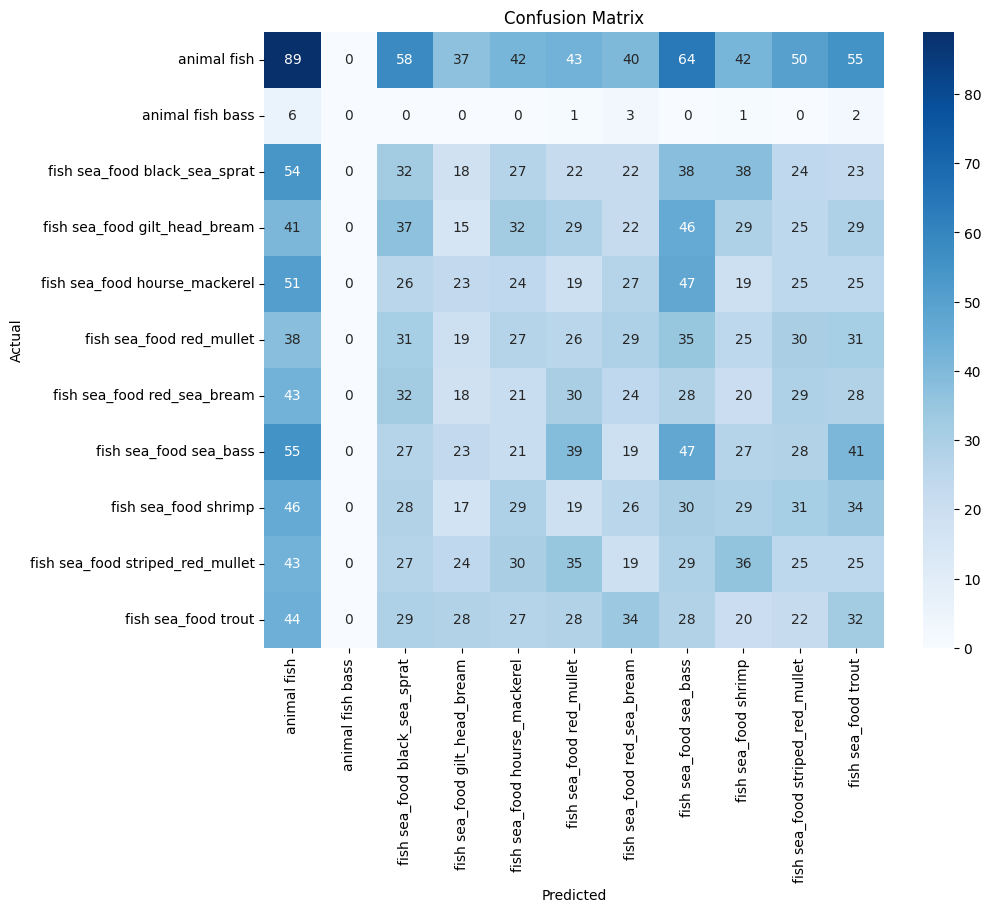

In [20]:
cm = confusion_matrix(y_true,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=test_data.class_indices.keys(),yticklabels=test_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()